# Testing analytics and modelling

For this we will be doing some testinf of different modelling techniques amd seeing whether anything works.

## Data importing

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
climate = pd.read_csv('clean data/climate_factors.csv')
socio = pd.read_csv('clean data/socioec_factors.csv')
wstress = pd.read_csv('clean data/water_stress.csv')
countries = pd.read_csv('shared_country_codes.csv')
countries = list(countries['0'])

## Checking the clean data

Need to remove the unnecessary countries from the datasets using the shared countries information. And then see what the situation is with the NANs.

In [3]:
climate = climate[climate['Country'].isin(countries)]
climate.isnull().sum()

Unnamed: 0                                          0
Country                                             0
Temperature (°C)                                    0
Total Rainfall (mm)                                 0
Total internal renewable water resources (IRWR)     1
Total external renewable water resources (ERWR)     0
Total renewable water resources                     0
Dependency ratio                                    0
Total exploitable water resources                  85
dtype: int64

Checking which countries are those that have NANs in the columns that have few NANs.

In [4]:
nan_climate = climate
nan_climate = nan_climate.loc[:, nan_climate.columns != 'Total exploitable water resources']
nan_climate = nan_climate[nan_climate.isna().any(axis = 1)]
nan_climate

,Unnamed: 0,Country,Temperature (°C),Total Rainfall (mm),Total internal renewable water resources (IRWR),Total external renewable water resources (ERWR),Total renewable water resources,Dependency ratio
172,172,SYC,27.674428,1690.743767,NaN,0.0,0.0,0.0


In [5]:
socio = socio[socio['Country'].isin(countries)]
socio.isnull().sum()

Unnamed: 0                                                                   0
Country                                                                      0
GDP per capita (current US$/inhab)                                           0
Human Development Index (HDI) [highest = 1] (-)                              0
Population density (inhab/km2)                                               0
Rural population (1000 inhab)                                                0
Rural population with access to safe drinking-water (JMP) (%)                0
Total population with access to safe drinking-water (JMP) (%)                0
Urban population (1000 inhab)                                                0
Urban population with access to safe drinking-water (JMP) (%)                0
DEC alternative conversion factor (LCU per US$)                              1
Fertility rate, total (births per woman)                                     0
GDP (constant LCU)                                  

Checking which countries are those that have NANs in the columns that have few NANs.

In [6]:
nan_socio = socio
nan_socio = nan_socio.loc[:, nan_socio.columns != 'Total debt service (% of GNI)']
nan_socio = nan_socio.loc[:, nan_socio.columns != 'Prevalence of HIV, total (% of population ages 15-49)']
nan_socio = nan_socio.loc[:, nan_socio.columns != 'Official exchange rate (LCU per US$, period average)']
nan_socio = nan_socio[nan_socio.isna().any(axis = 1)]
nan_socio

,Unnamed: 0,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [highest = 1] (-),Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to safe drinking-water (JMP) (%),Total population with access to safe drinking-water (JMP) (%),Urban population (1000 inhab),Urban population with access to safe drinking-water (JMP) (%),...,"GNI per capita, PPP (current international $)",General government total expenditure (current LCU),"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Population aged 25-64 years (thousands),Population growth (annual %),Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total population (thousands)
35,35,DJI,2891.234525,0.492,40.693922,213.906,64.7,90.0,743.079,97.4,...,4720.0,1.364250e+11,64.0,54.2,103.542,104.06,417.4,1.66,0.60,913.8
72,72,KOR,31852.314810,0.904,509.385056,9429.948,87.9,97.6,41552.264,99.7,...,37774.0,NaN,82.0,3.0,865.804,977.32,30549.0,0.46,0.78,50771.2
121,121,SYR,721.520956,0.544,92.319246,8495.489,87.2,90.1,9774.379,92.3,...,NaN,NaN,70.2,17.8,NaN,NaN,7841.4,-3.60,NaN,18169.6
135,135,VEN,7756.479109,0.735,32.237798,3778.814,77.9,93.1,28198.251,95.0,...,NaN,1.752000e+08,72.6,17.6,NaN,NaN,14198.6,0.02,NaN,29831.8
138,138,YEM,854.926716,0.463,52.720456,18075.808,46.5,54.9,10174.612,72.0,...,3520.0,1.885474e+12,66.0,43.0,93.630,90.40,9143.0,2.58,0.40,26494.2


Checking which countries are those that have NANs in the columns that have few NANs.

In [7]:
wstress = wstress[wstress['Country'].isin(countries)]
wstress.isnull().sum()

nan_wstress = wstress[wstress.isna().any(axis=1)]
nan_wstress

,Unnamed: 0,Country,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
43,43,DJI,6.333333,NaN,6.333333
64,64,GNQ,0.076154,NaN,0.183503
66,66,GRD,7.050000,NaN,7.050000
104,104,MDV,15.666667,NaN,15.666667
130,130,PNG,0.048951,NaN,0.132243
156,156,SYC,NaN,89.323035,NaN


## Start of making some models

Focus on climate first. Ideas:
- Regression
- Clustering
- PCA


In [22]:
allclimate = pd.merge(climate, wstress, on = 'Country', how = 'outer')
allclimate = allclimate.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])
allclimate = allclimate.drop(allclimate[allclimate['Country'] == 'SYC'].index)
allclimate.isna().sum()

Country                                             0
Temperature (°C)                                    0
Total Rainfall (mm)                                 0
Total internal renewable water resources (IRWR)     0
Total external renewable water resources (ERWR)     0
Total renewable water resources                     0
Dependency ratio                                    0
Total exploitable water resources                  84
Water stress (MDG)                                  0
Water use efficiency (SDG)                          5
Water stress (SDG)                                  0
dtype: int64

In [26]:
cols = list(allclimate.columns)
cols.remove('Country')
cols

['Temperature (°C)',
 'Total Rainfall (mm)',
 'Total internal renewable water resources (IRWR)',
 'Total external renewable water resources (ERWR)',
 'Total renewable water resources',
 'Dependency ratio',
 'Total exploitable water resources',
 'Water stress (MDG)',
 'Water use efficiency (SDG)',
 'Water stress (SDG)']

## Exploratory plots

We can plot the explanatory variables against the potential target variables. 

In [66]:
cols = list(allclimate.columns)
cols.remove('Country')
exp_cols = cols
exp_cols.remove('Water stress (MDG)')
exp_cols.remove('Water use efficiency (SDG)')
exp_cols.remove('Water stress (SDG)')

expl_choice = widgets.Dropdown(
    options=exp_cols,
    value=exp_cols[0],
    description='Value:',
    disabled=False,
)

trgt_cols = ['Water stress (MDG)', 'Water use efficiency (SDG)', 'Water stress (SDG)']

trgt_choice = widgets.Dropdown(
    options = trgt_cols,
    value = trgt_cols[0],
    description = 'Value:',
    disabled = False,
)

log_choice = widgets.Dropdown(
    options = ['None', 'Target', 'Explanatory', 'Both'],
    value = 'None',
    description = 'Selection:',
    disabled = False
)

selection = widgets.Accordion(children=[expl_choice, trgt_choice, log_choice])
selection.set_title(0, 'Explanatory variable')
selection.set_title(1, 'Target variable')
selection.set_title(2, 'Take log of variables')
selection

Accordion(children=(Dropdown(description='Value:', options=('Temperature (°C)', 'Total Rainfall (mm)', 'Total …

Text(0.5, 1.0, 'Exploratory plot')

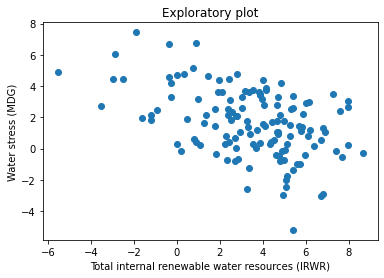

In [70]:
if log_choice.value == 'None':
    plt.scatter(x = allclimate[expl_choice.value], y = (allclimate[trgt_choice.value]))
elif log_choice.value == 'Target':
    plt.scatter(x = allclimate[expl_choice.value], y = np.log(allclimate[trgt_choice.value]))
elif log_choice.value == 'Explanatory':
    plt.scatter(x = np.log(allclimate[expl_choice.value]), y = (allclimate[trgt_choice.value]))
elif log_choice.value == 'Both':
    plt.scatter(x = np.log(allclimate[expl_choice.value]), y = np.log(allclimate[trgt_choice.value]))
plt.xlabel(expl_choice.value)
plt.ylabel(trgt_choice.value)
plt.title('Exploratory plot')

If we play aroung with the plots we can see that the target variables have a distribution with many small values and a few very large values. If we take the *log()* of the target values the plots look a lot better and much more readable. This is something that we should keep in mind when creating model, especially regression models.

All the water resource explanatory variables suffer from a similar problem of having varied values with many small values and a few very large values.


## Basic modelling

We will use some basic modelling techniques to whether there are any interesting behaviours in the data. Based on the exploratory plots, it would make sese to use the *log()* values for some of the variables, both explanatory andtarget, for some types of the modelling techniques.